In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import datetime as dt
import pandas_datareader.data as web
import matplotlib.pyplot as plt

In [195]:
start = dt.datetime(2021,12,23)-dt.timedelta(days=728)
print(start)

2019-12-26 00:00:00


In [59]:
data_asia = yf.download("^HSI 000001.SS ^N225", start = start, end="2021-12-23")["Close"]
data_c = yf.download("BZ=F GC=F DX-Y.NYB", start = start, end="2021-12-23")["Close"]
bonds = yf.download("^FVX ^TNX ^TYX", start = start, end="2021-12-23")["Close"]
data_oc = yf.download("^VIX ^DJI ^IXIC SPY ^RUT", start = start, end="2021-12-23",interval = "1h")[["Open","Close"]]
data = data_oc["Close"]
data_o = data_oc["Open"]

[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  5 of 5 completed


In [60]:
end = dt.datetime(2021,12,23)
corp_yield = web.DataReader("BAMLH0A0HYM2EY","fred",start,end)

In [61]:
data.head()

,SPY,^DJI,^IXIC,^RUT,^VIX
2019-12-26 09:30:00-05:00,322.140015,28561.720703,8987.383789,1678.177734,12.64
2019-12-26 10:30:00-05:00,322.304993,28586.740234,8997.121094,1678.204102,12.68
2019-12-26 11:30:00-05:00,322.054993,28560.400391,8993.986328,1675.996338,12.71
2019-12-26 12:30:00-05:00,322.319489,28568.949219,9009.064453,1676.930176,12.61
2019-12-26 13:30:00-05:00,322.299988,28570.800781,9009.581055,1677.275269,12.62


In [62]:
data_o.head()

,SPY,^DJI,^IXIC,^RUT,^VIX
2019-12-26 09:30:00-05:00,321.790009,28539.460938,8970.397461,1680.223389,12.68
2019-12-26 10:30:00-05:00,322.140015,28561.759766,8988.006836,1678.164673,12.64
2019-12-26 11:30:00-05:00,322.304993,28586.500000,8997.010742,1678.194092,12.69
2019-12-26 12:30:00-05:00,322.049988,28560.140625,8993.943359,1675.995850,12.71
2019-12-26 13:30:00-05:00,322.315002,28568.949219,9009.017578,1676.922974,12.61


In [63]:
print(len(corp_yield.index),len(corp_yield.index))

528 528


In [64]:
data = data.dropna(subset=["SPY"],axis=0)
data_o = data_o.dropna(subset=["SPY"],axis=0)

In [65]:
data_asia = data_asia.pct_change()
data_c = data_c.pct_change().shift()
returns = pd.merge(data_c,data_asia,how="left",left_index=True,right_index=True)

In [66]:
returns.head()

,BZ=F,DX-Y.NYB,GC=F,000001.SS,^HSI,^N225
Date,,,,,,
2019-12-26,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-27,NaN,NaN,NaN,-0.000771,NaN,-0.003645
2019-12-30,0.003534,-0.006865,0.002982,0.011643,0.003329,-0.007597
2019-12-31,0.004108,-0.001857,0.000462,0.003322,-0.004578,0.000000
2020-01-02,-0.000877,-0.003618,0.003301,0.011499,0.012550,0.000000


In [67]:
returns.columns = ["Brent","USDX","Gold","SSE","HSI","Nikkei"]

In [68]:
spreads = pd.concat([corp_yield,bonds],axis=1)
spreads["TN_vs_F"] = spreads["^TNX"]-spreads["^FVX"]
spreads["TY_vs_F"] = spreads["^TYX"]-spreads["^FVX"]
spreads["Corp_vs_F"] = spreads["BAMLH0A0HYM2EY"]-spreads["^FVX"]
spreads = spreads.loc[:,["^FVX","TN_vs_F","TY_vs_F","Corp_vs_F"]].pct_change().shift()
spreads = spreads.rename(columns={'^FVX':'FVX'})

In [69]:
spreads.head()

,FVX,TN_vs_F,TY_vs_F,Corp_vs_F
2019-12-26,NaN,NaN,NaN,NaN
2019-12-27,NaN,NaN,NaN,NaN
2019-12-30,-0.027246,0.088889,0.034314,0.010408
2019-12-31,0.001788,0.091837,0.045813,0.007517
2020-01-01,0.007139,0.056075,0.051360,0.004974


In [70]:
data.columns = ["SPY", "DOW", "Nasdaq", "Russel", "VIX"]
data_o.columns = ["SPY", "DOW", "Nasdaq", "Russel", "VIX"]
data_asia.columns = ["SSE","HSI","Nikkei"]

In [71]:
data.head(10)

,SPY,DOW,Nasdaq,Russel,VIX
2019-12-26 09:30:00-05:00,322.140015,28561.720703,8987.383789,1678.177734,12.64
2019-12-26 10:30:00-05:00,322.304993,28586.740234,8997.121094,1678.204102,12.68
2019-12-26 11:30:00-05:00,322.054993,28560.400391,8993.986328,1675.996338,12.71
2019-12-26 12:30:00-05:00,322.319489,28568.949219,9009.064453,1676.930176,12.61
2019-12-26 13:30:00-05:00,322.299988,28570.800781,9009.581055,1677.275269,12.62
2019-12-26 14:30:00-05:00,322.184998,28562.589844,9004.448242,1675.786377,12.60
2019-12-26 15:30:00-05:00,322.910004,28621.839844,9021.313477,1677.366455,12.57
2019-12-27 09:30:00-05:00,323.045013,28667.439453,9017.541992,1669.842896,13.18
2019-12-27 10:30:00-05:00,323.339996,28686.750000,9029.749023,1673.903442,12.96
2019-12-27 11:30:00-05:00,323.070007,28676.890625,9016.104492,1671.197998,13.32


In [72]:
gap = data_o/data.shift()
initial = data/data_o.shift()
gap = gap[gap.index.hour==9]
initial = initial[initial.index.hour==10]
ret = data.loc[data.index.hour==15,"SPY"].pct_change()
y = data.loc[np.logical_or(data.index.hour==9,data.index.hour==15),"SPY"]
y = y.pct_change()[y.index.hour==15]

In [73]:
print(len(gap.index),len(initial.index),len(ret.index),len(y))

503 503 500 500


In [74]:
gap.index = gap.index.date
initial.index = initial.index.date
ret.index = ret.index.date
y.index = y.index.date

In [75]:
lag_1 = ret.shift()
lag_2 = ret.shift(2)
lag_3 = ret.shift(3)

In [76]:
gap.columns = ["gap_"+i for i in gap.columns]
initial.columns =["init_"+i for i in initial.columns]

In [77]:
ML_data_a = pd.concat([y,lag_1,lag_2,lag_3],axis=1)
ML_data_a.columns = ["y","lag_1","lag_2","lag_3"]
ML_data_b = pd.concat([gap,initial],axis=1)
ML_data = pd.merge(ML_data_a,ML_data_b,how="left",left_index=True,right_index=True)
ML_data = pd.merge(ML_data,returns,how="left",left_index=True,right_index=True)
ML_data = pd.merge(ML_data,spreads,how="left",left_index=True,right_index=True)

In [78]:
ML_data.head()

,y,lag_1,lag_2,lag_3,gap_SPY,gap_DOW,gap_Nasdaq,gap_Russel,gap_VIX,init_SPY,...,Brent,USDX,Gold,SSE,HSI,Nikkei,FVX,TN_vs_F,TY_vs_F,Corp_vs_F
2019-12-26,0.002390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.001600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-27,-0.000511,NaN,NaN,NaN,1.002570,1.001869,1.003068,1.002317,1.010342,0.998764,...,NaN,NaN,NaN,-0.000771,NaN,-0.003645,NaN,NaN,NaN,NaN
2019-12-30,0.000654,-0.000093,NaN,NaN,1.000062,1.000392,0.999786,1.000455,1.047085,0.995386,...,0.003534,-0.006865,0.002982,0.011643,0.003329,-0.007597,-0.027246,0.088889,0.034314,0.010408
2019-12-31,0.003460,-0.005482,-0.000093,NaN,0.998194,0.998045,0.996699,0.997455,1.031607,0.999927,...,0.004108,-0.001857,0.000462,0.003322,-0.004578,0.000000,0.001788,0.091837,0.045813,0.007517
2020-01-02,0.005634,0.002429,-0.005482,-0.000093,1.005685,1.004067,1.007561,1.004642,0.959052,0.998301,...,-0.000877,-0.003618,0.003301,0.011499,0.012550,0.000000,0.000000,0.000000,0.000000,0.000000


In [79]:
ML_data.isna().sum()

y              0
lag_1          2
lag_2          3
lag_3          4
gap_SPY        1
gap_DOW        1
gap_Nasdaq     1
gap_Russel     1
gap_VIX        1
init_SPY       0
init_DOW       0
init_Nasdaq    0
init_Russel    0
init_VIX       0
Brent          2
USDX           2
Gold           2
SSE            2
HSI            3
Nikkei         2
FVX            2
TN_vs_F        2
TY_vs_F        2
Corp_vs_F      2
dtype: int64

In [80]:
ML_data = ML_data.dropna(axis=0)

In [81]:
y = [0 if i<0 else 1 for i in ML_data["y"]]

In [82]:
x=ML_data.drop("y",axis=1)

In [83]:
x["dw"] = x.index.dayofweek

In [84]:
x.head()

,lag_1,lag_2,lag_3,gap_SPY,gap_DOW,gap_Nasdaq,gap_Russel,gap_VIX,init_SPY,init_DOW,...,USDX,Gold,SSE,HSI,Nikkei,FVX,TN_vs_F,TY_vs_F,Corp_vs_F,dw
2020-01-02,0.002429,-0.005482,-0.000093,1.005685,1.004067,1.007561,1.004642,0.959052,0.998301,1.002040,...,-0.003618,0.003301,0.011499,0.012550,0.000000,0.000000,0.000000,0.000000,0.000000,3
2020-01-03,0.009165,0.002429,-0.005482,0.988671,0.989157,0.988517,0.989362,1.158147,1.004577,1.002719,...,0.004772,0.003291,-0.000458,-0.003224,0.000000,-0.012995,-0.066372,-0.037356,-0.007699,4
2020-01-06,-0.007388,0.009165,0.002429,0.994294,0.994040,0.991657,0.993595,1.107801,1.005147,1.004089,...,-0.000103,0.016202,-0.000123,-0.007919,-0.019097,-0.050868,-0.042654,-0.010448,0.015240,0
2020-01-07,0.003784,-0.007388,0.009165,0.997992,0.997735,1.000332,0.997967,1.037984,1.001362,1.001220,...,-0.001755,0.010973,0.006938,0.003397,0.015982,0.015763,-0.009901,0.010558,-0.012282,1
2020-01-08,-0.002781,0.003784,-0.007388,0.999887,0.998316,0.999923,1.000048,1.005835,1.004235,1.003634,...,0.003207,0.003576,-0.012210,-0.008267,-0.015735,0.004966,0.040000,0.023881,-0.007737,2


In [85]:
print(len(x.index),len(y))

495 495


In [86]:
x.corr()

,lag_1,lag_2,lag_3,gap_SPY,gap_DOW,gap_Nasdaq,gap_Russel,gap_VIX,init_SPY,init_DOW,...,USDX,Gold,SSE,HSI,Nikkei,FVX,TN_vs_F,TY_vs_F,Corp_vs_F,dw
lag_1,1.000000,-0.298045,0.221501,-0.233699,-0.240042,-0.191163,-0.078085,0.076569,0.158606,0.129902,...,-0.073152,0.148748,0.142877,0.170955,0.342215,0.364599,0.259514,0.173679,-0.602014,-0.026437
lag_2,-0.298045,1.000000,-0.296755,0.202356,0.182999,0.148835,0.103903,0.027215,0.030187,0.097746,...,-0.302061,-0.052158,0.005878,0.014389,-0.037888,-0.137889,-0.119127,0.016857,-0.095343,0.003451
lag_3,0.221501,-0.296755,1.000000,-0.011813,0.044701,-0.034311,0.016610,0.011075,-0.094187,-0.138522,...,-0.003610,0.078009,0.119362,0.093546,0.034087,-0.014510,-0.021070,-0.045153,-0.138802,0.030025
gap_SPY,-0.233699,0.202356,-0.011813,1.000000,0.945475,0.935228,0.801168,-0.593382,-0.239694,0.159353,...,-0.035502,0.084280,0.306918,0.446754,0.382359,-0.141614,-0.205163,-0.118283,0.098513,-0.021390
gap_DOW,-0.240042,0.182999,0.044701,0.945475,1.000000,0.836964,0.809784,-0.470740,-0.255142,0.040726,...,-0.077499,0.106139,0.284731,0.414435,0.345809,-0.147135,-0.223876,-0.145937,0.117827,-0.009881
gap_Nasdaq,-0.191163,0.148835,-0.034311,0.935228,0.836964,1.000000,0.766730,-0.671612,-0.162972,0.199280,...,0.025836,0.026442,0.297036,0.434860,0.355605,-0.153870,-0.190526,-0.108101,0.106208,-0.034559
gap_Russel,-0.078085,0.103903,0.016610,0.801168,0.809784,0.766730,1.000000,-0.445857,-0.082318,0.183805,...,-0.001520,0.064396,0.239691,0.390156,0.368043,-0.118121,-0.186805,-0.091967,0.043701,-0.042903
gap_VIX,0.076569,0.027215,0.011075,-0.593382,-0.470740,-0.671612,-0.445857,1.000000,-0.020234,-0.321870,...,-0.069286,0.019468,-0.129733,-0.290625,-0.202154,0.042797,0.127064,0.110135,-0.074867,-0.133860
init_SPY,0.158606,0.030187,-0.094187,-0.239694,-0.255142,-0.162972,-0.082318,-0.020234,1.000000,0.798355,...,0.001554,-0.071535,-0.056075,-0.010495,0.001511,0.060706,0.043273,0.054875,-0.126774,-0.081980
init_DOW,0.129902,0.097746,-0.138522,0.159353,0.040726,0.199280,0.183805,-0.321870,0.798355,1.000000,...,0.050068,-0.024693,0.081455,0.190512,0.197342,0.037612,0.001857,0.056908,-0.153457,-0.078069


In [87]:
np.sum(x.corr()>0.65)-1

lag_1          0
lag_2          0
lag_3          0
gap_SPY        3
gap_DOW        3
gap_Nasdaq     3
gap_Russel     3
gap_VIX        0
init_SPY       2
init_DOW       2
init_Nasdaq    1
init_Russel    1
init_VIX       0
Brent          0
USDX           0
Gold           0
SSE            0
HSI            0
Nikkei         0
FVX            0
TN_vs_F        1
TY_vs_F        1
Corp_vs_F      0
dw             0
dtype: int64

In [90]:
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [91]:
tscv = TimeSeriesSplit(n_splits=10,max_train_size=400,test_size=10)
par = {"max_depth":[4,5,6,7,8],"max_features":[19,20,21,22,23,24],"min_samples_leaf":[1,2,3,4,5]}
predictions = []
importances = []

In [89]:
495*0.8

396.0

In [97]:
rfr = RandomForestClassifier()
gscv = GridSearchCV(rfr,par,cv=tscv,n_jobs=4)
gscv.fit(x.iloc[0:400,:],y[0:400])
p_1 = gscv.best_params_["max_depth"]
p_2 = gscv.best_params_["max_features"]
p_3 = gscv.best_params_["min_samples_leaf"]
rfr = RandomForestClassifier(max_depth= p_1,max_features=p_2,min_samples_leaf=p_3,n_jobs=4)
rfr.fit(x.iloc[0:400,:],y[0:400])
p = rfr.predict_proba(x.iloc[400:,:])

In [98]:
c = [1 if i >= 0.5 else 0 for i in p[:,1]]

In [99]:
accuracy_score(c,y[400:])

0.6

In [100]:
rfr.score(x.iloc[:400,:],y[:400])

0.86

In [102]:
print(p_1,p_2,p_3)

5 20 5


Text(0.5, 1.0, 'Feature importances')

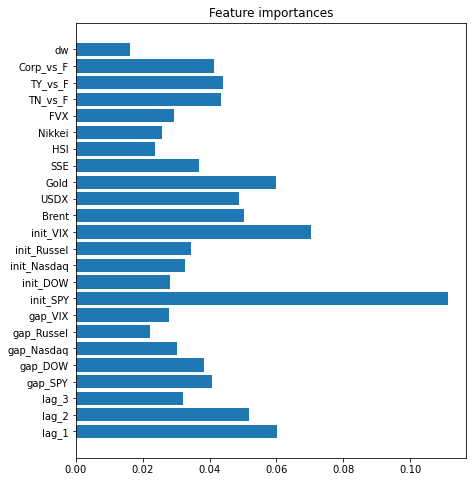

In [175]:
plt.figure(figsize=(7,8))
plt.barh(x.columns, rfr.feature_importances_)
plt.title("Feature importances")

In [183]:
model_a = [i if j>=0.5 else -i for i,j in zip(ML_data.iloc[400:,0],p[:,1])] 
model_b = [i if j>=0.4 else -i for i,j in zip(ML_data.iloc[400:,0],p[:,1])]
model_c = [i if j>=0.3 else -i for i,j in zip(ML_data.iloc[400:,0],p[:,1])]

In [184]:
model_a = np.array(model_a)+1
model_b = np.array(model_b)+1
model_c = np.array(model_c)+1
model_a = pd.Series(model_a,index=x.iloc[400:,:].index)
model_b = pd.Series(model_b,index=x.iloc[400:,:].index)
model_c = pd.Series(model_c,index=x.iloc[400:,:].index)
compare = pd.concat([model_a,model_b,model_c],axis=1)

In [189]:
ret.index = pd.to_datetime(ret.index)
ret.index = ret.index.date
ind = ret + 1
compare = pd.merge(compare,ind,how="left",left_index=True,right_index=True)

In [186]:
compare_prod = compare.cumprod()

Text(0.5, 1.0, 'Strategy comparation (test data)')

<Figure size 1440x720 with 0 Axes>

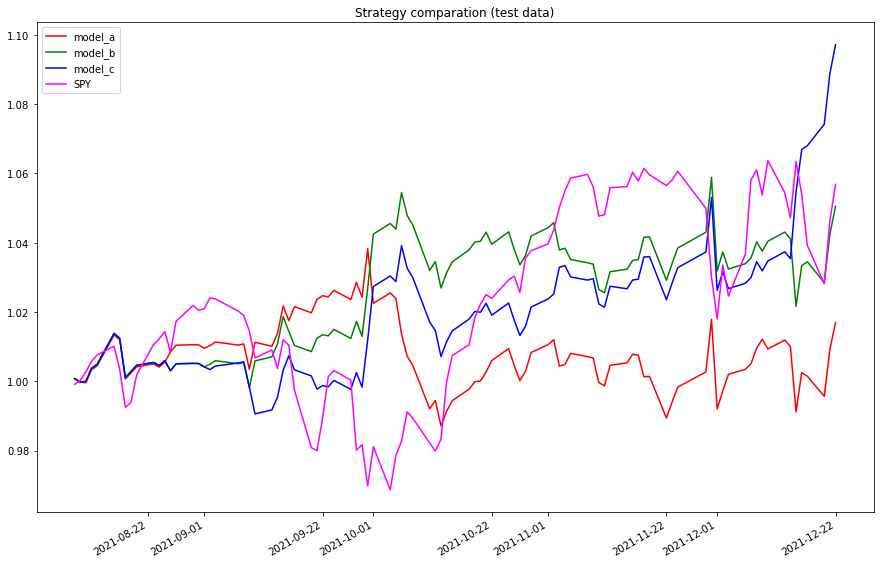

In [187]:
plt.figure(figsize=(20,10))
compare_prod.plot(figsize=(15,10),color=["red","green","blue","magenta"])
plt.legend(["model_a","model_b","model_c","SPY"])
plt.title("Strategy comparation (test data)")

In [217]:
model_a = [i if j>=0.5 else -i for i,j in zip(ML_data.iloc[400:,0],p[:,1])] 
model_b = [i if j>=0.4 else -i for i,j in zip(ML_data.iloc[400:,0],p[:,1])]
model_c = [i if j>=0.3 else -i for i,j in zip(ML_data.iloc[400:,0],p[:,1])]
model_a = pd.Series(model_a,index=x.iloc[400:,:].index)
model_b = pd.Series(model_b,index=x.iloc[400:,:].index)
model_c = pd.Series(model_c,index=x.iloc[400:,:].index,name="model_c")
metrics =pd.concat([model_a,model_b,model_c],axis=1)
metrics = pd.merge(metrics,ret,how="left",left_index=True,right_index=True)
metrics.columns = ["model_a","model_b","model_c","SPY"]
metrics.describe()

,model_a,model_b,model_c,SPY
count,95.000000,95.000000,95.000000,95.000000
mean,0.000196,0.000538,0.000995,0.000614
std,0.006210,0.006190,0.006132,0.008052
min,-0.025419,-0.025419,-0.025419,-0.020195
25%,-0.001464,-0.001817,-0.001652,-0.003917
50%,0.001017,0.001017,0.001027,0.001588
75%,0.003354,0.003401,0.003750,0.004568
max,0.015146,0.015198,0.018681,0.020642
